## Trabalho de grupo realizado por Abel Alberto, Hugo Lopes, Luana Pereira e Rui Ferreira

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [17]:
# Carregar o dataset integrado
df = pd.read_csv("dataset_integrado.csv")

/var/folders/zn/76llcf_53y1gktzpnrpfpcdr0000gn/T/ipykernel_8091/4270673340.py:2: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("dataset_integrado.csv")


In [18]:
df['estado'] = df['estado'].str.lower()


In [19]:
# Configurações visuais
plt.style.use("seaborn-v0_8")
sns.set_palette("pastel")

In [20]:
# Verificação inicial
print("Shape:", df.shape)
print(df.columns)

Shape: (3030411, 50)
Index(['fração_id', 'condominio', 'bloco', 'andar', 'porta', 'tipo_fracao',
       'area_m2', 'quota_mensal', 'proprietario_nome', 'proprietario_nif',
       'data_aquisicao', 'valor_aquisicao', 'situacao', 'ano_aquisicao',
       'preco_m2', 'z_quota', 'is_outlier_quota', 'motivo_outlier',
       'keep_negocio', 'situacao ', 'Unnamed: 0', 'pagamento_id',
       'mes_referencia', 'data_vencimento', 'data_pagamento', 'valor_quota',
       'multa', 'estado', 'metodo_pagamento', 'status_pagamento',
       'dias_atraso', 'ocorrencia_id', 'fração_origem', 'tipo',
       'descricao_completa', 'data_ocorrencia', 'gravidade', 'resolvido',
       'acao_tomada', 'manutencao_id', 'tipo_intervencao', 'area_afetada',
       'descricao', 'data_reportada', 'data_inicio', 'data_conclusao',
       'fornecedor', 'custo_total', 'urgencia', 'estado_man'],
      dtype='object')


## Análise 1 – Percentagem de frações com atrasos crónicos

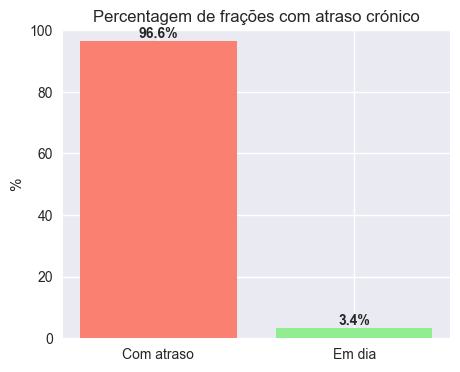

96.6% das frações apresentam atrasos crónicos no pagamento.


In [21]:

# Qual a percentagem de frações que apresentam atrasos crónicos no pagamento das quotas?

# Visualização
df['estado_norm'] = df['estado'].str.lower().str.strip()

# Contagem
fra_total = df['fração_id'].nunique()
fra_atraso = df.loc[df['estado_norm'].isin(['em atraso','pendente']), 'fração_id'].nunique()
perc = fra_atraso / fra_total * 100

# --- Visualização ---
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
plt.bar(['Com atraso', 'Em dia'],
        [perc, 100 - perc],
        color=['salmon','lightgreen'])
plt.title('Percentagem de frações com atraso crónico')
plt.ylabel('%')
plt.ylim(0,100)  # garante que a escala vai até 100%
for i, v in enumerate([perc, 100 - perc]):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', fontweight='bold')
plt.show()

print(f"{perc:.1f}% das frações apresentam atrasos crónicos no pagamento.")


# d) Insight de Negócio
# Alta taxa de incumprimento compromete o fluxo de caixa do condomínio.

# e) Recomendação de Ação
# Implementar alertas automáticos e negociar planos de pagamento.

Análise 2 – Montante total em quotas em dívida por condomínio

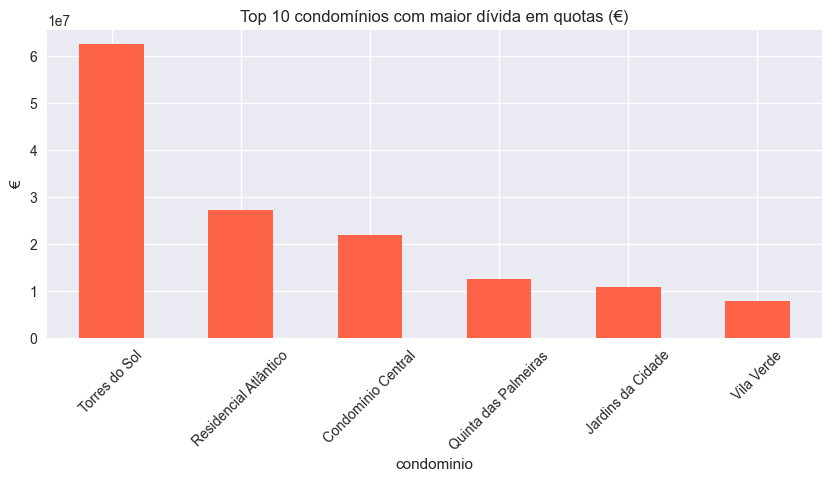

Condomínio com maior dívida em quotas: condominio
Torres do Sol    62512036.8
Name: valor_quota, dtype: float64


In [22]:
# a) Questão de Negócio
# Quais os condomínios com maior dívida acumulada em quotas?

# b) Visualização
divida = df[df['estado']=='em atraso'].groupby('condominio')['valor_quota'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,4))
divida.head(10).plot(kind='bar', color='tomato')
plt.title('Top 10 condomínios com maior dívida em quotas (€)')
plt.ylabel('€')
plt.xticks(rotation=45)
plt.show()

# c) Interpretação Técnica
print("Condomínio com maior dívida em quotas:", divida.head(1))

# d) Insight de Negócio
# Identificar e agir sobre os condomínios que concentram a maior dívida.

# e) Recomendação de Ação
# Priorizar planos de cobrança e acompanhamento próximo.


## Análise 3 – Custo de manutenção por fração


/var/folders/zn/76llcf_53y1gktzpnrpfpcdr0000gn/T/ipykernel_8091/1250311829.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  custo = df.groupby('condominio').apply(lambda x: x['custo_total'].sum() / x['fração_id'].nunique())


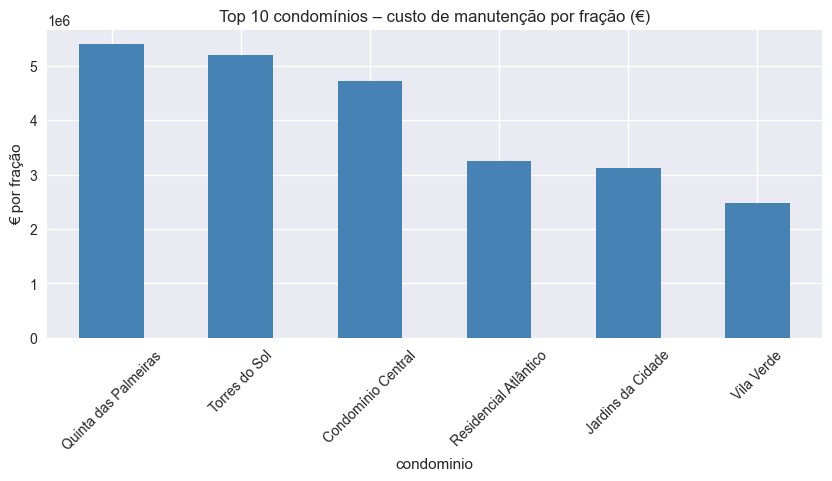

Condomínio com maior custo médio de manutenção: condominio
Condomínio Central    4.713209e+06
dtype: float64


In [23]:
# a) Questão de Negócio
# Quais os condomínios com maior custo de manutenção médio por fração?

# b) Visualização
custo = df.groupby('condominio').apply(lambda x: x['custo_total'].sum() / x['fração_id'].nunique())
custo.sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,4), color='steelblue')
plt.title('Top 10 condomínios – custo de manutenção por fração (€)')
plt.ylabel('€ por fração')
plt.xticks(rotation=45)
plt.show()

# c) Interpretação Técnica
print("Condomínio com maior custo médio de manutenção:", custo.head(1))

# d) Insight de Negócio
# Identifica onde o orçamento de manutenção é mais pesado.

# e) Recomendação de Ação
# Rever contratos de manutenção e avaliar fornecedores.


## Análise 4 – Tipos de reclamações mais frequentes

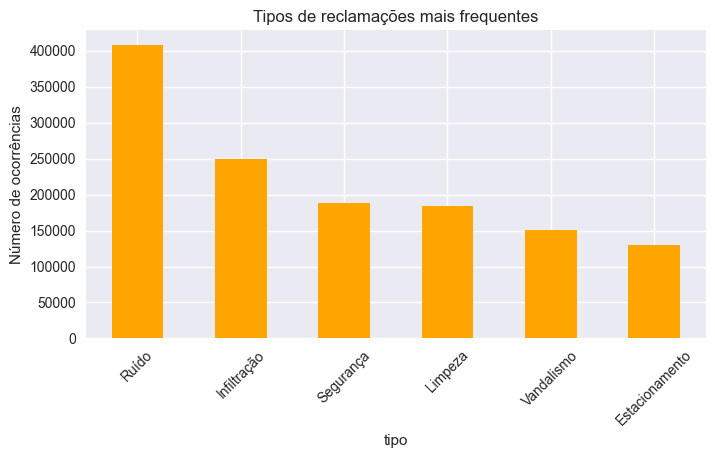

tipo
Ruído             408240
Infiltração       249624
Segurança         187920
Limpeza           184704
Vandalismo        150168
Estacionamento    129984
Name: count, dtype: int64


In [24]:
# a) Questão de Negócio
# Quais os tipos de reclamações mais comuns?

# b) Visualização
tipos = df['tipo'].value_counts()
tipos.plot(kind='bar', figsize=(8,4), color='orange')
plt.title('Tipos de reclamações mais frequentes')
plt.ylabel('Número de ocorrências')
plt.xticks(rotation=45)
plt.show()

# c) Interpretação Técnica
print(tipos)

# d) Insight de Negócio
# Permite priorizar ações corretivas (ex.: ruído, estacionamento).

# e) Recomendação de Ação
# Focar nas categorias mais recorrentes para reduzir reclamações.


## Análise 5 – Frações com dívida e reclamações

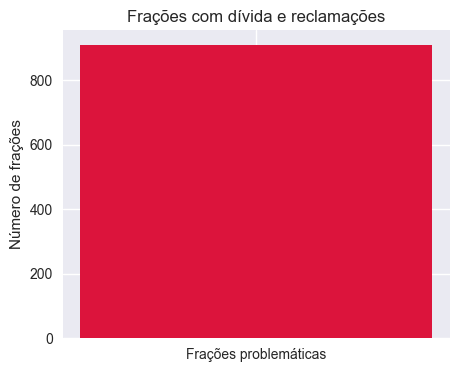

Frações problemáticas: 909


In [25]:
# a) Questão de Negócio
# Quantas frações têm simultaneamente dívidas e reclamações?

# b) Visualização
df['tem_divida'] = df['estado'].isin(['em atraso','pendente'])
clientes_problematicos = df.groupby('fração_id').agg(
    tem_divida=('tem_divida','max'),
    tem_reclamacao=('ocorrencia_id','count')
)
clientes_problematicos = clientes_problematicos[
    (clientes_problematicos['tem_divida']) & (clientes_problematicos['tem_reclamacao'] > 0)
]

plt.figure(figsize=(5,4))
plt.bar(['Frações problemáticas'], [clientes_problematicos.shape[0]], color='crimson')
plt.title('Frações com dívida e reclamações')
plt.ylabel('Número de frações')
plt.show()

# c) Interpretação Técnica
print("Frações problemáticas:", clientes_problematicos.shape[0])

# d) Insight de Negócio
# Identifica frações com maior risco financeiro e social.

# e) Recomendação de Ação
# Contactar individualmente e criar plano de acompanhamento.


## Análise 6 – Condomínios com frações em dívida e reclamações

Condomínios com frações que têm simultaneamente dívida e reclamações:


,frações_com_divida,frações_com_reclamacao,frações_totais
condominio,,,
Condomínio Central,106832,181632,397
Jardins da Cidade,113334,215280,436
Quinta das Palmeiras,132570,215136,382
Residencial Atlântico,104688,192672,443
Torres do Sol,185460,316800,464
Vila Verde,93360,189120,378


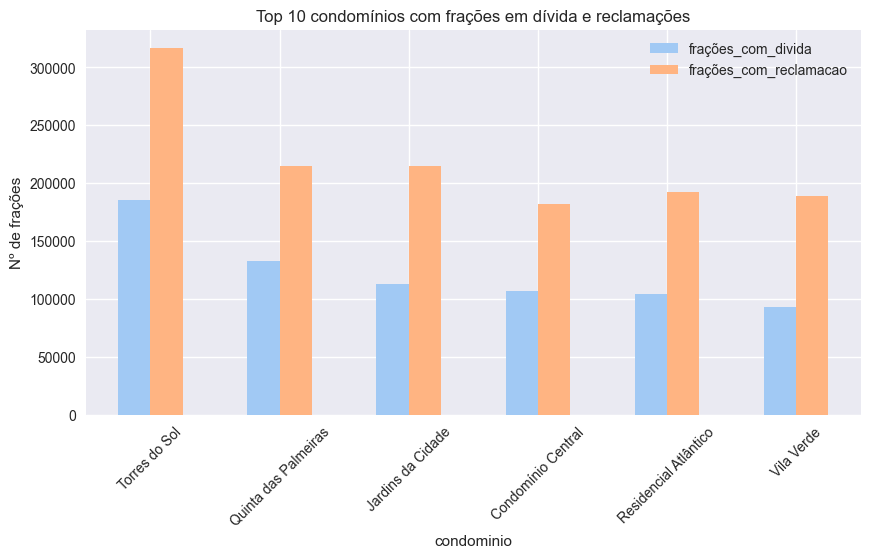

In [26]:
# Normalizar coluna estado
df['estado_norm'] = df['estado'].str.lower().str.strip()

# Marcar frações com dívida
df['tem_divida'] = df['estado_norm'].isin(['em atraso','pendente'])

# Marcar frações com pelo menos uma reclamação
df['tem_reclamacao'] = df['ocorrencia_id'].notna()

# Agrupar por condomínio e contar
condominios_risco = (
    df.groupby('condominio')
      .agg(
          frações_com_divida=('tem_divida', 'sum'),
          frações_com_reclamacao=('tem_reclamacao', 'sum'),
          frações_totais=('fração_id', 'nunique')
      )
)

# Filtrar condomínios onde há pelo menos 1 fração com dívida e 1 com reclamação
condominios_risco = condominios_risco[
    (condominios_risco['frações_com_divida'] > 0) &
    (condominios_risco['frações_com_reclamacao'] > 0)
]

print("Condomínios com frações que têm simultaneamente dívida e reclamações:")
display(condominios_risco.head(10))

# Visualização
condominios_risco.sort_values('frações_com_divida', ascending=False).head(10)[
    ['frações_com_divida','frações_com_reclamacao']
].plot(kind='bar', figsize=(10,5))
plt.title('Top 10 condomínios com frações em dívida e reclamações')
plt.ylabel('Nº de frações')
plt.xticks(rotation=45)
plt.show()


## Análise 7: Evolução mensal do total de quotas em atraso

In [27]:
def remover_outliers_zscore(df, coluna, threshold=3):
    # Calcula o z-score ignorando valores nulos
    z_score = np.abs(stats.zscore(df[coluna].dropna()))
    # Máscara para identificar outliers
    outlier_mask = z_score > threshold
    # Índices válidos (sem NaN)
    indices_validos = df[coluna].dropna().index
    # Índices que correspondem a outliers
    indices_outliers = indices_validos[outlier_mask]
    # Retorna o dataframe sem os outliers
    return df.drop(indices_outliers)
 

In [28]:
df_sem_outliers = remover_outliers_zscore(df, "valor_quota", threshold=3)
 

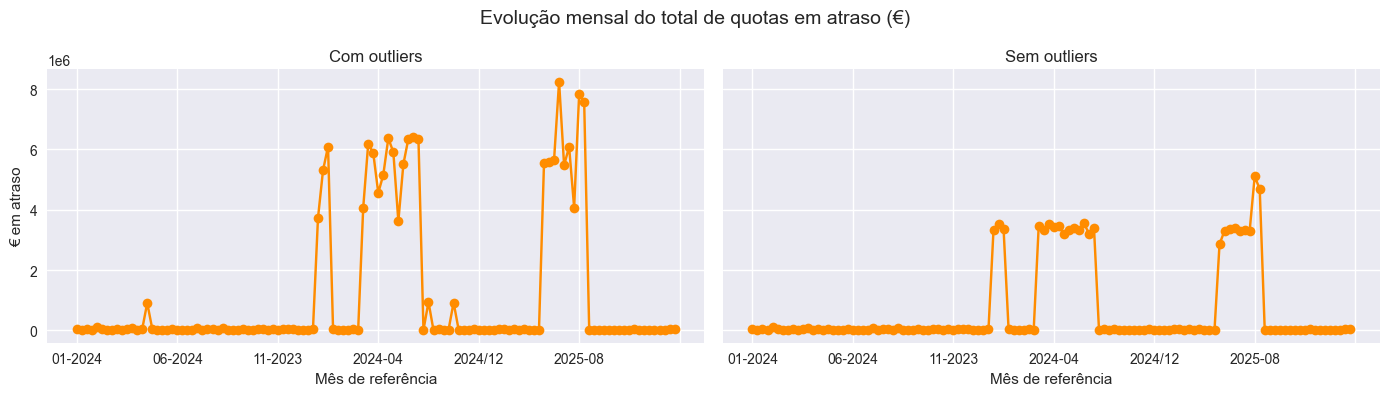

In [29]:

# Série com outliers
pagamentos_mensais = (
    df[df['estado_norm'].isin(['em atraso','pendente'])]
      .groupby('mes_referencia')['valor_quota']
      .sum()
      .sort_index()
)
 
# Série sem outliers
pagamentos_mensais_sem_out = (
    df_sem_outliers[df_sem_outliers['estado_norm'].isin(['em atraso','pendente'])]
      .groupby('mes_referencia')['valor_quota']
      .sum()
      .sort_index()
)
 
# Criar os subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharey=True)
 
# Plot com outliers
pagamentos_mensais.plot(ax=axes[0], kind='line', marker='o', color='darkorange')
axes[0].set_title('Com outliers')
axes[0].set_ylabel('€ em atraso')
axes[0].set_xlabel('Mês de referência')
axes[0].grid(True)
 
# Plot sem outliers
pagamentos_mensais_sem_out.plot(ax=axes[1], kind='line', marker='o', color='darkorange')
axes[1].set_title('Sem outliers')
axes[1].set_xlabel('Mês de referência')
axes[1].grid(True)
 
plt.suptitle('Evolução mensal do total de quotas em atraso (€)', fontsize=14)
plt.tight_layout()
plt.show()
 
 